In [1]:
import sys
import numpy
import matplotlib
import pandas
import sklearn

print ("Python: {}" .format(sys.version))
print ("Numpy: {}" .format(numpy.__version__))
print ("Matplotlib: {}" .format(matplotlib.__version__))
print ("pandas: {}" .format(pandas.__version__))
print ("sklearn: {}" .format(sklearn.__version__))

Python: 3.5.5 |Anaconda, Inc.| (default, Apr  7 2018, 04:52:34) [MSC v.1900 64 bit (AMD64)]
Numpy: 1.15.2
Matplotlib: 2.2.2
pandas: 0.23.4
sklearn: 0.20.0


In [12]:
import numpy as np
# cross_validation is now in model_selection as cross_validate so as train_test_split
from sklearn import preprocessing
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Support Vector Machine Classifier
from sklearn.svm import SVC
# model selection to use both in one step 
from sklearn import model_selection
# train test split
from sklearn.model_selection import train_test_split
# metrics
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# loading the dataset from the UCI repository for ML
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 
         'marginal_adhesion', 'single epithelial_size', 'bare_nuclei', 
         'blend_chromatin', 'normal_nucleoli', 'mitoses', 'class']
# dataframe
df = pd.read_csv(url, names=names)

In [4]:
# preprocess
# replace missing data 
df.replace('?', -99999, inplace=True)
print(df.axes)
# drop the id class because it is not relevant 
df.drop(['id'], 1, inplace=True)
# print the shape of the dataset
print(df.shape)


[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single epithelial_size', 'bare_nuclei',
       'blend_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [5]:
# visualisations on dataset
print(df.loc[698])
print(df.describe())

clump_thickness            4
uniform_cell_size          8
uniform_cell_shape         8
marginal_adhesion          5
single epithelial_size     4
bare_nuclei                5
blend_chromatin           10
normal_nucleoli            4
mitoses                    1
class                      4
Name: 698, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single epithelial_size  blend_chromatin  \
count         699.000000      

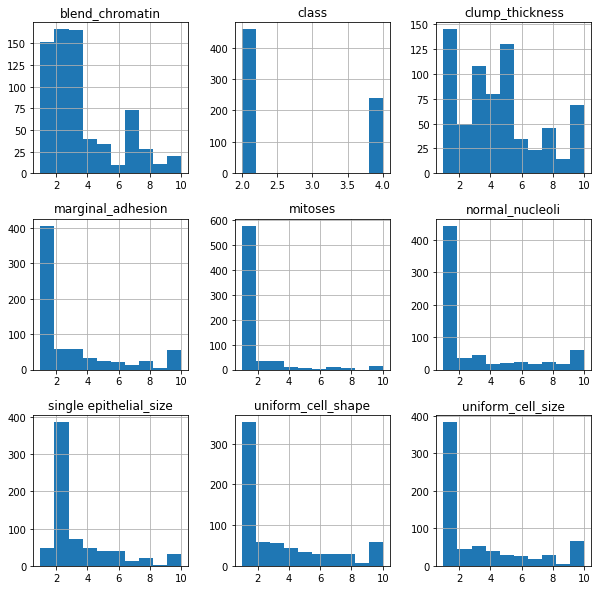

In [6]:
# histograms for each variable
df.hist(figsize = (10,10))
plt.show()

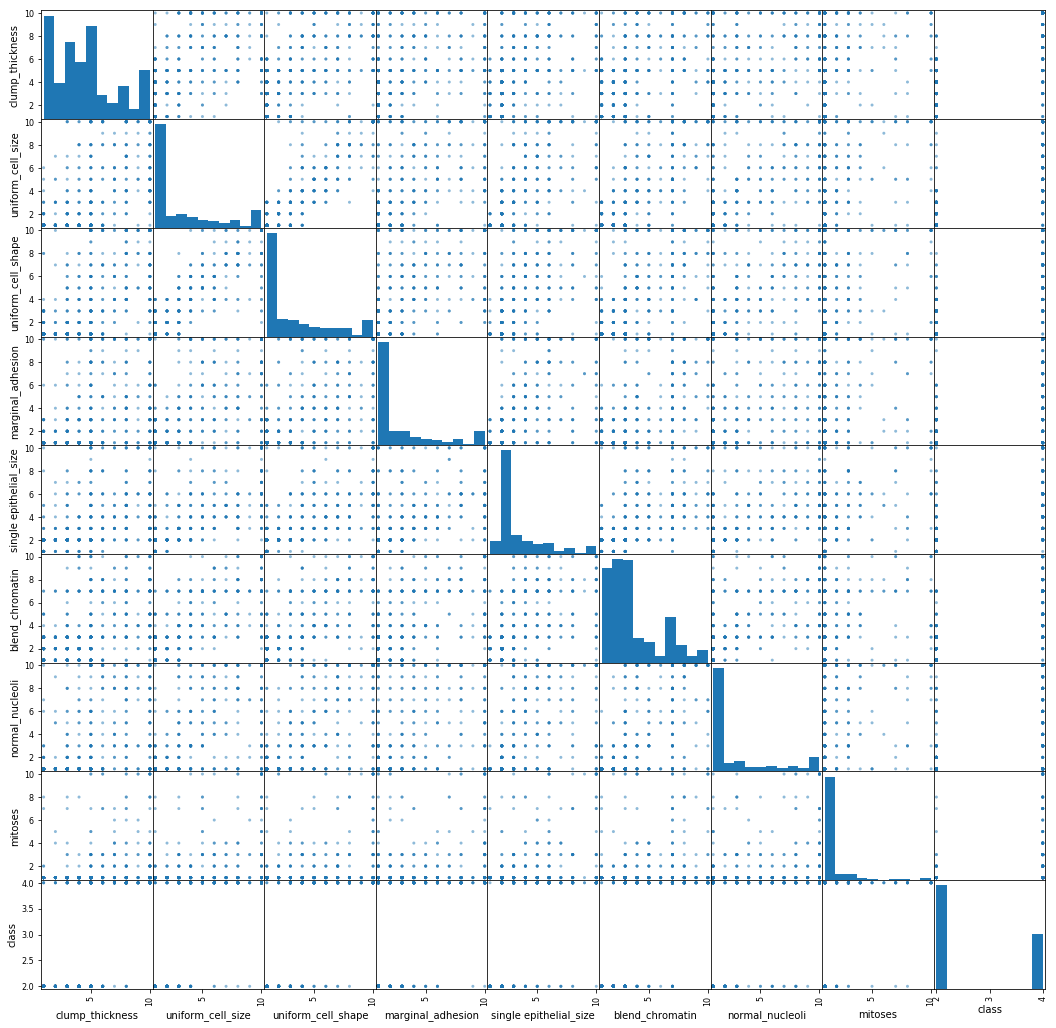

In [7]:
# create scatter plot matrix
scatter_matrix(df, figsize= (18,18))
plt.show()

# no strong relationships (linear relationships) between any variables
# only uniform_cell_shape and uniform_cell_size but that is trivial

In [21]:
# split the dataset for training and testing (X and Y)

# drop the class for the X data 
X = np.array(df.drop( ['class'] , 1 ))
# y is the class column
y = np.array( df['class'] )
# split dataset with 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
# specifications for testing ( KNeighbors ) 
seed = 8 
scoring = 'accuracy'

In [23]:
# definition of the models to train
models = []
models.append ( ('KNN', KNeighborsClassifier(n_neighbors = 5)) )
models.append ( ('SVM', SVC()) )

# eval each models in turn 
results = []
names = []

for name, model in models:
    # run each model n_splits times and take the avg result
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    # results including mean, std, etc.
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring)
    # append results and name
    results.append(cv_results)
    names.append(name)
    # display a message with the results 
    msg = "%s %f (%f)" % ( name, cv_results.mean(), cv_results.std() )
    print(msg)

KNN 0.964188 (0.030987)
SVM 0.960617 (0.020894)


C:\Users\Indigo\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Indigo\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Indigo\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Indigo\

In [24]:
# predict on the validation dataset 

for name, model in models:
    # train on training data
    model.fit(X_train, y_train)
    # use the model to predict on the testing data
    predictions = model.predict(X_test)
    
    print(name)
    # accuracy values test labels vs. predictions
    print( accuracy_score(y_test, predictions) )
    print( classification_report(y_test, predictions) )

KNN
0.9857142857142858
              precision    recall  f1-score   support

           2       1.00      0.98      0.99        86
           4       0.96      1.00      0.98        54

   micro avg       0.99      0.99      0.99       140
   macro avg       0.98      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140

SVM
0.9571428571428572
              precision    recall  f1-score   support

           2       1.00      0.93      0.96        86
           4       0.90      1.00      0.95        54

   micro avg       0.96      0.96      0.96       140
   macro avg       0.95      0.97      0.96       140
weighted avg       0.96      0.96      0.96       140



C:\Users\Indigo\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [29]:
# make a support vector classifier
clf = SVC()

clf.fit( X_train, y_train)

accuracy = clf.score( X_test, y_test )
print ( accuracy )

# do an example

example = np.array([[4,2,1,2,1,2,3,2,5]])
# reshape to column vector
example = example.reshape( len(example), -1)

prediction = clf.predict(example)
print(prediction)

0.9571428571428572
[4]


C:\Users\Indigo\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
